# Stock Market Predict

In [3]:
## IMPORTS AND SETUP
import pandas_datareader as web
import os, math, numpy as np, pandas as pd, matplotlib.pyplot as plt, datetime, pandas,sys
from pathlib import Path
addPath = Path(r'c:\Users\jmarulan\OneDrive - Intel Corporation\Documents\Code\customPythonPkgs')
if f'{addPath}' not in sys.path: sys.path.append(f'{addPath}')
import stockModels
os.environ['http_proxy'] = 'http://proxy.fm.intel.com:911'
os.environ['https_proxy'] = 'http://proxy.fm.intel.com:911'
plt.style.use('fivethirtyeight')


        # groups = 14
        # farBack = 60
        # ## Create a new dataframe with only the close column
        # self.groups = 14
        # self.farBack = math.ceil(farBack / groups)
        # self.closeData = closeData
        # ## Create groups and take the median from it
        # groupsNum = math.floor(len(closeData) / self.groups)
        # self.start = len(closeData) - groupsNum * self.groups
        # self.closeSets = self._buildSets(closeData)


ModuleNotFoundError: No module named 'stockModels'

## Extrapolate Data into The FUTURE from Sequence Model

In [12]:
## Inputs
stocks = ['TSLA','NVDA','INTC','ZNGA','DIS','PINS']; 
stocks = ['ABNB']
end = str(datetime.datetime.now()).split()[0]; start = str(datetime.datetime.now() - datetime.timedelta(days=5*365)).split()[0]; models = {}; dfs = {}
for stock in stocks:
    dfs[stock] = web.DataReader(stock, data_source='yahoo',start=start,end=end)
    data = dfs[stock].filter(["Close"]); groups = 14; farBack = 60
    models[stock] = stockModels.sequence_model(data.values, groups, farBack)
    models[stock].trainme()
    models[stock].predict()

                 Close
Date                  
2020-12-10  144.710007
2020-12-11  139.250000
2020-12-14  130.000000
2020-12-15  124.800003
2020-12-16  137.990005
2020-12-17  147.050003
2020-12-18  157.300003
2020-12-21  163.020004
2020-12-22  163.190002
2020-12-23  158.009995
2020-12-24  154.839996
2020-12-28  149.000000
2020-12-29  150.000000
2020-12-30  148.429993
2020-12-31  146.800003
2021-01-04  139.149994
2021-01-05  148.300003
2021-01-06  142.770004
2021-01-07  151.270004
2021-01-08  149.770004
2021-01-11  148.130005
2021-01-12  160.800003
2021-01-13  169.990005
2021-01-14  180.500000
2021-01-15  169.270004
2021-01-19  173.690002
2021-01-20  161.830002
2021-01-21  180.399994
2021-01-22  181.869995
2021-01-25  177.529999
2021-01-26  192.740005
2021-01-27  201.250000
2021-01-28  187.369995
2021-01-29  183.630005
2021-02-01  180.440002
2021-02-02  179.169998
2021-02-03  185.720001
2021-02-04  195.800003
2021-02-05  195.309998
2021-02-08  200.429993
2021-02-09  199.880005
2021-02-10 

IndexError: tuple index out of range

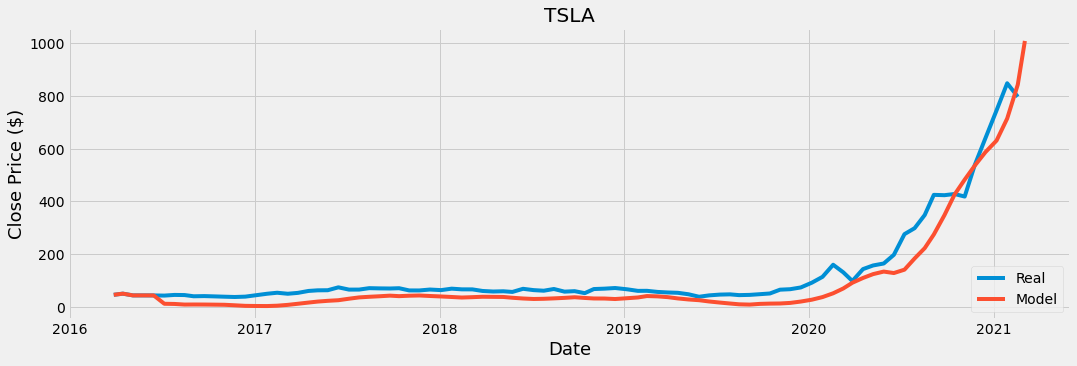

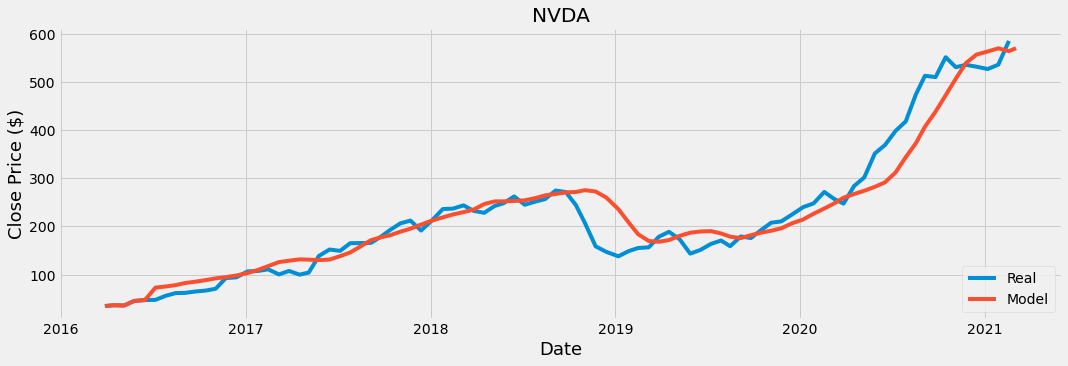

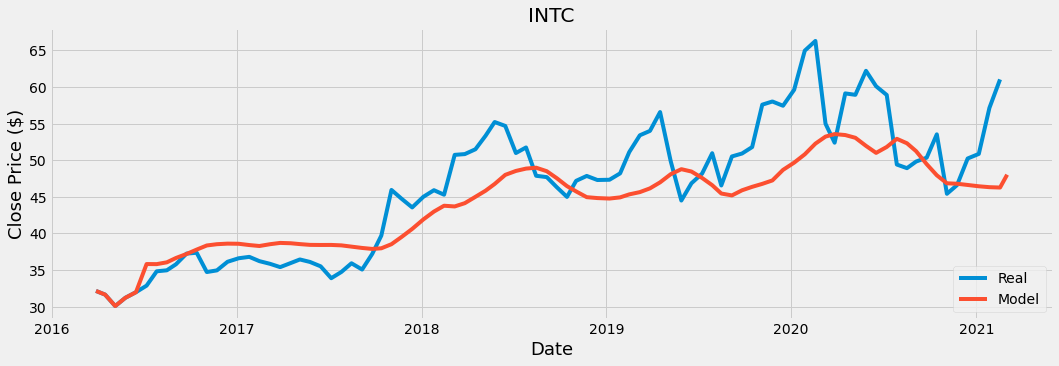

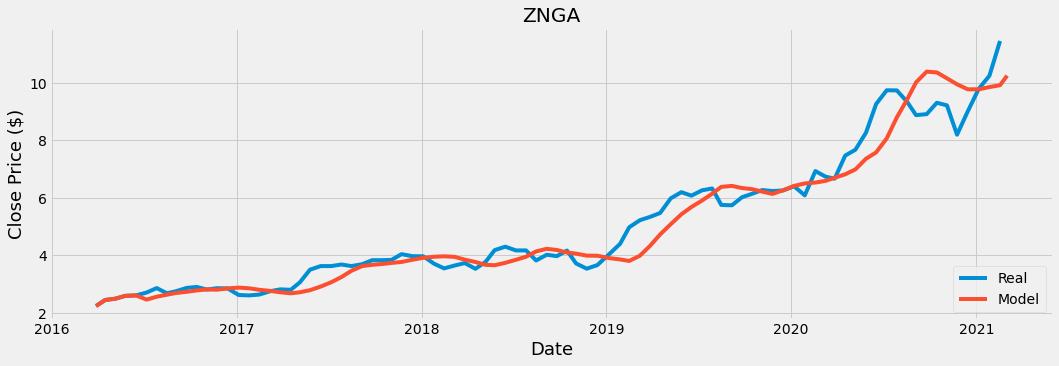

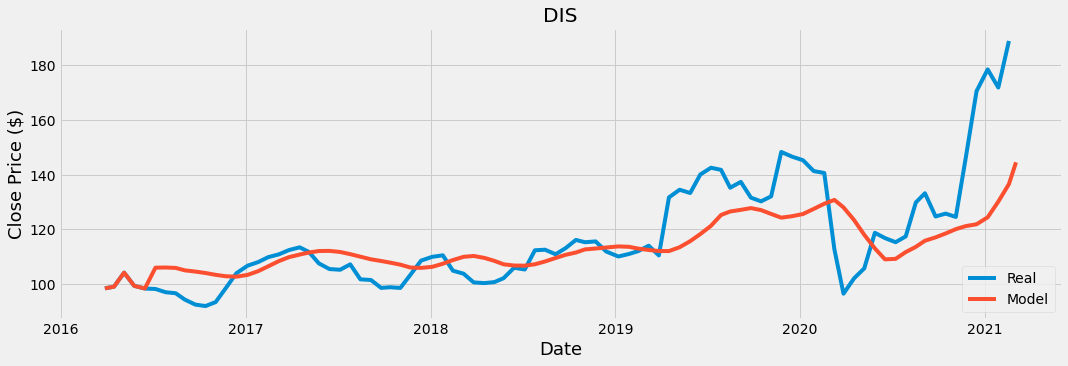

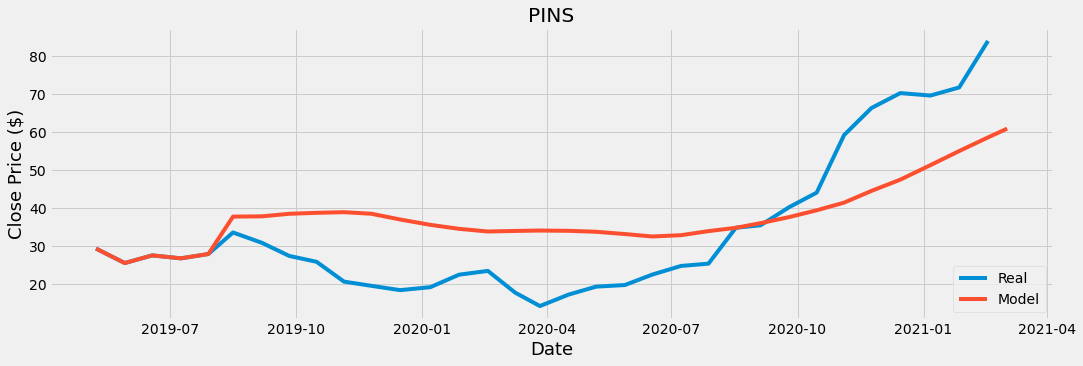

In [7]:
# Plot the data
for stock in stocks:
    model,df = models[stock],dfs[stock]
    yReal=np.reshape(np.array(model.closeSets[:]),[len(model.closeSets)]); step = math.ceil(model.groups/2)
    effDates = [df.index[ii+step] for ii in range(model.start,len(df.index),model.groups)]
    effDates.append(effDates[-1] + datetime.timedelta(days=groups))
    yReal = np.append(yReal, np.nan); 
    results = pd.DataFrame({'Close':yReal,'Model':model.predictions},index=effDates)
    plt.figure(figsize=(16,5)); plt.title(stock); plt.xlabel('Date',fontsize=18); plt.ylabel('Close Price ($)', fontsize=18); 
    plt.plot(results[:]); plt.legend(['Real','Model'],loc='lower right')
    plt.show()